In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.4.1'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(r'C:\Users\Jishnuraj k\Desktop\VIT Winter Semester 2020-2021\RBL\Data\Mydata\MyData\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 217 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'C:\Users\Jishnuraj k\Desktop\VIT Winter Semester 2020-2021\RBL\Data\Mydata\MyData\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                           shuffle=False)


Found 43 images belonging to 4 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
history=cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
7/7 [==============================] - 3s 515ms/step - loss: 0.2366 - accuracy: 0.9078 - val_loss: 0.4368 - val_accuracy: 0.9070
Epoch 2/50
7/7 [==============================] - 3s 349ms/step - loss: 0.2607 - accuracy: 0.9263 - val_loss: 0.3653 - val_accuracy: 0.8605
Epoch 3/50
7/7 [==============================] - 3s 398ms/step - loss: 0.2583 - accuracy: 0.8940 - val_loss: 0.4367 - val_accuracy: 0.8837
Epoch 4/50
7/7 [==============================] - 3s 426ms/step - loss: 0.2438 - accuracy: 0.9124 - val_loss: 0.3899 - val_accuracy: 0.8372
Epoch 5/50
7/7 [==============================] - 3s 414ms/step - loss: 0.2335 - accuracy: 0.9078 - val_loss: 0.3814 - val_accuracy: 0.9070
Epoch 6/50
7/7 [==============================] - 3s 418ms/step - loss: 0.2080 - accuracy: 0.9124 - val_loss: 0.3976 - val_accuracy: 0.9070
Epoch 7/50
7/7 [==============================] - 2s 300ms/step - loss: 0.2148 - accuracy: 0.9032 - val_loss: 0.3758 - val_accuracy: 0.8605
Epoch 8/50
7/7 [====

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 5

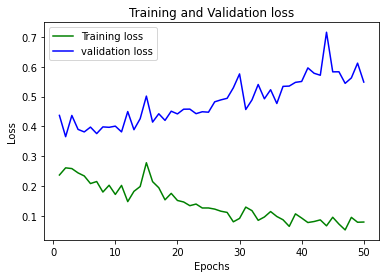

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

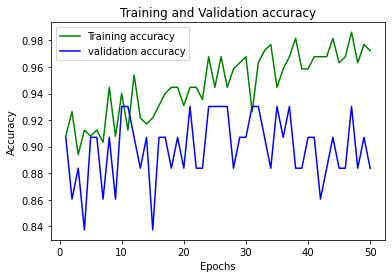

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import itertools  
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

Confusion Matrix
Normalized confusion matrix


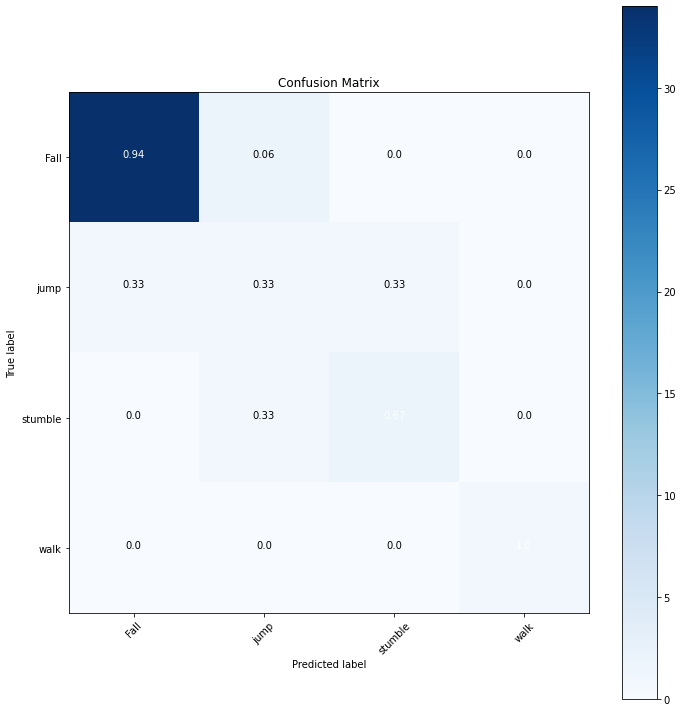

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
#Confution Matrix and Classification Report

target_names = []

for key in test_set.class_indices:

    target_names.append(key)

Y_pred = cnn.predict_generator(test_set)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_set.classes, y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
test_score = cnn.evaluate_generator(test_set, 32)



print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

[INFO] accuracy: 88.37%
[INFO] Loss:  0.5488199591636658
